In [1]:
# - Astro-packages
import astropy
import astropy.units as u
import astropy.coordinates as coord
import astropy.table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun, get_moon #- for tranformations, takes ref. from simbad.
from astropy.time import Time
from astropy.table import QTable, Table
from astroplan import (observability_table,FixedTarget, Observer, AltitudeConstraint, AtNightConstraint, MoonSeparationConstraint, SunSeparationConstraint)
from astroplan.utils import time_grid_from_range
from astroquery.simbad import Simbad 

In [2]:
#     Simbad.add_votable_fields('typed_id', 'distance')
result_table = Simbad.query_region("NGC2368")

result_table.colnames

['MAIN_ID',
 'RA',
 'DEC',
 'RA_PREC',
 'DEC_PREC',
 'COO_ERR_MAJA',
 'COO_ERR_MINA',
 'COO_ERR_ANGLE',
 'COO_QUAL',
 'COO_WAVELENGTH',
 'COO_BIBCODE',
 'SCRIPT_NUMBER_ID']

In [3]:
import numpy as np
from matplotlib import pyplot as plt 
from astropy import units as u
from photutils import DAOStarFinder
from scipy . optimize import curve_fit


# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["figure.dpi"] = 100
# plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': True,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

def linear_fit(x, y):
    def lin_func(x, m, c):
        return m*x + c
    # --- fitting data for graph --- 
    popt, pcov = curve_fit(lin_func, x, y)
    fit_data = lin_func(x, popt[0], popt[1])
    return fit_data

Text(0.5, 0, 'Known Apparant Magnitude')

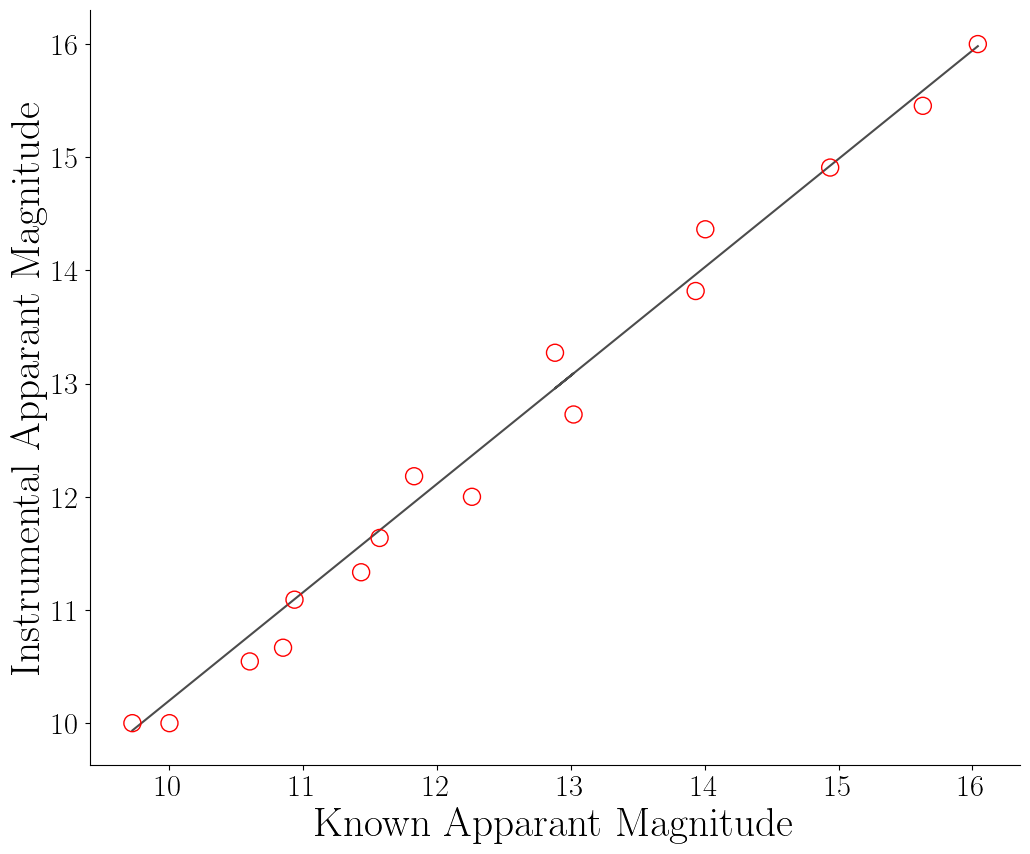

In [15]:
y = np.linspace(10, 16, 12)
x = y + np.random.normal(0, .2, 12)
y_f = linear_fit(x, y)
ly = np.linspace(10, 12, 4) 
lx = np.linspace(10, 12, 4) + np.random.normal(0, .2, 4)



plt.scatter(x, y, zorder = 3, facecolors='none', edgecolors='r', s = 150)
plt.scatter(lx, ly, zorder = 3, facecolors='none', edgecolors='r', s = 150)
plt.plot(x, y_f, 'k-', alpha = 0.7, zorder = 0)
plt.ylabel('Instrumental Apparant Magnitude')
plt.xlabel('Known Apparant Magnitude')
